# Handwritten Digit Recognition using CNN in Python with Keras

## Preparing the Dataset

In [2]:
import numpy as np
import pandas as pd
import keras

In [ ]:
import os
print(os.listdir("../input"))
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [ ]:
columns=[]
for col in train.columns:
    if col != 'label':
        columns.append(col)

In [ ]:
X_train = train[columns]
print(X_train.shape)
y_train = train['label']
print(y_train.shape)

## Neural Network Architecture

In [6]:
from keras.layers import Dense # Dense -> fully conected layer
from keras.models import Sequential

image_size = 784
num_classes = 10

model = Sequential()

model.add(Dense(units = 32, activation = 'sigmoid',input_shape =(image_size,)))
model.add(Dense(units = num_classes,activation ='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


 training and evaluating the model :
    
-  selected a common loss function called categorical cross entropy.
-  selected one of the simplest optimization algorithms: Stochastic Gradient Descent (SGD).

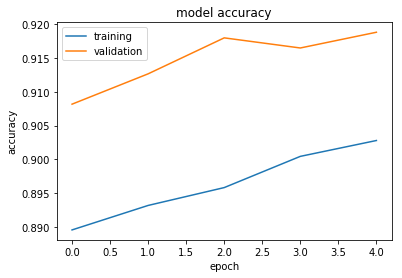

Test loss: 0.369
Test accuracy: 0.907


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics =['accuracy'])
history = model.fit(x_train,y_train,batch_size =128,epochs =5,verbose = False, validation_split =0.1)
loss,accuracy = model.evaluate(x_test,y_test,verbose = False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

We can see the plot of training and validation accuracy over the time. Final accuracy is around 0.92

## Network depth and layer width

### Network Depth 

The depth of multi-layer perceptron(also known as a fully connected neural network) is determined by it's number of hidden layers. The model we have used has only one hidden layer so it's a shallow network. 

so, for deep learning, we will experiment with layers of different lengths and see how it affects the performance.

In [11]:
def create_dense(layer_size):
    model = Sequential()
    model.add(Dense(layer_size[0],activation = 'sigmoid',input_shape =(image_size,)))
    
    for s in layer_size[1:] :
        model.add(Dense(units = s, activation = 'sigmoid'))
    model.add(Dense(units = num_classes,activation ='softmax'))
    
    return model

def evaluate(model,batch_size =128, epochs =5) :
    model.summary()
    model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics =['accuracy'])
    history = model.fit(x_train,y_train, batch_size = batch_size, epochs = epochs,verbose =False,validation_split =.1)
    loss, accuracy = model.evaluate(x_test,y_test, verbose = False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


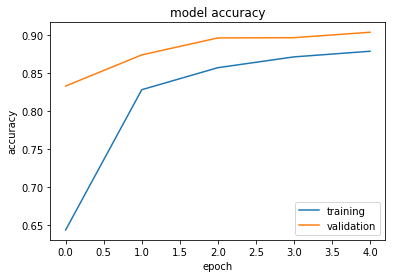


Test loss: 0.488
Test accuracy: 0.89
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


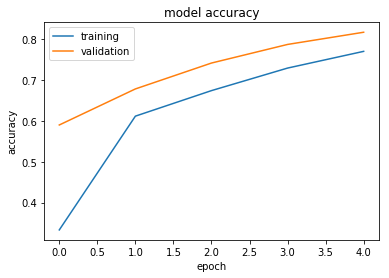


Test loss: 1.2
Test accuracy: 0.789
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


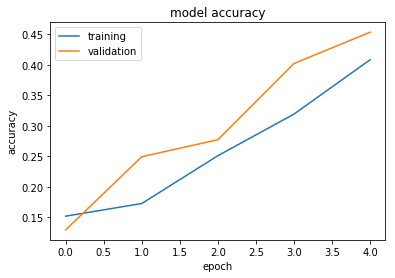


Test loss: 2.16
Test accuracy: 0.438
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


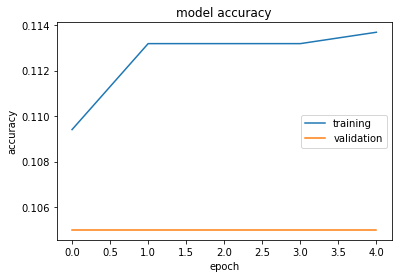


Test loss: 2.29
Test accuracy: 0.114


In [12]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Adding more layers have decreased the accuracy of the model.This is not intuitive. One cause of this may be overfitting. We can check overfitting when we can see that training accuracy is more than test accuracy but this is only in the case of 4 hidden layers. so, problem may be something else.
Since, every layers as input gets output of previous layer so there may be prevalent information loss.
Also, neural networks take time to train, so we can try by incresing the time span.


we try by incresing time span from 5 epochs to 40 epochs for model with 3 hidden layers and see the result.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


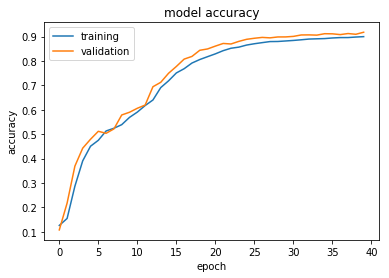


Test loss: 0.423
Test accuracy: 0.9


In [13]:
model = create_dense([32]*3)
evaluate(model,epochs =40)

Now, we can see that, model is giving proper accuracy.
so, we should always experiment on our models to find which of the factors are creating problems.

### Layer Width

Width of a lyer is number of nodes in each layer. Making wider layers tends to scale the number of parameters faster than adding more layers. Every time we add a single node to layer i, we have to give that new node an edge to every node in layer i+1.

Using create_dense and evaluate functions, we try to compare neural networks with different widths with single hidden layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


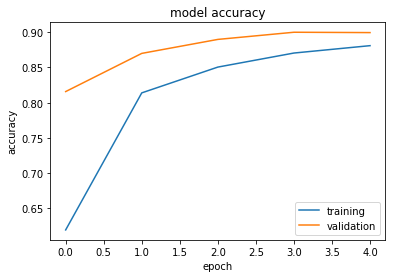


Test loss: 0.486
Test accuracy: 0.886
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


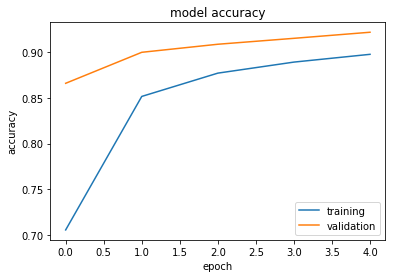


Test loss: 0.385
Test accuracy: 0.903
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


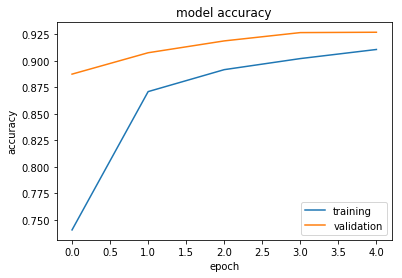


Test loss: 0.314
Test accuracy: 0.917
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


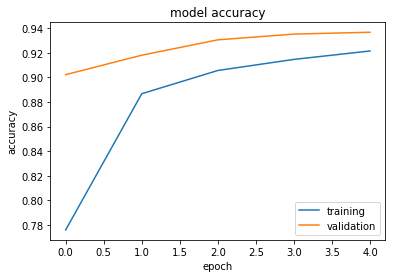


Test loss: 0.271
Test accuracy: 0.928
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


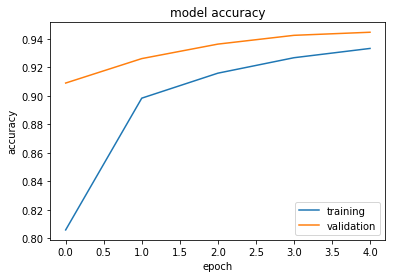


Test loss: 0.24
Test accuracy: 0.933
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


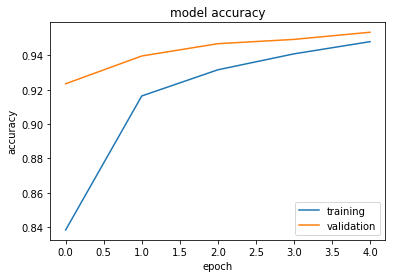


Test loss: 0.206
Test accuracy: 0.944
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_36 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


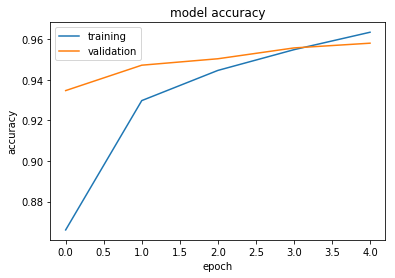


Test loss: 0.178
Test accuracy: 0.951


In [14]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

From the plots, we observe that increasing number of nodes in a layer is increasing the performance from ~88% in case of 32 nodes to ~95% in acse of 2048 nodes. We can see that, in the last case with 2048 nodes, the training accuracy is somewhat predicted the accuracy of test data - so probabily there is no overfitting.

The cost of this improvement was increased training time.

### combining width and depth

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


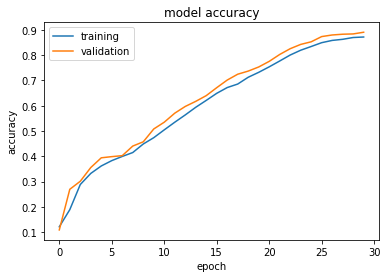


Test loss: 0.58
Test accuracy: 0.878
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


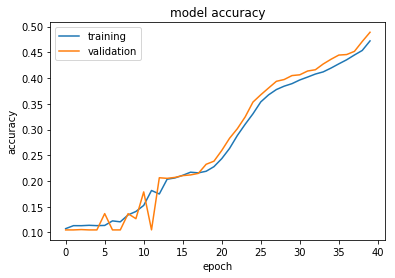


Test loss: 1.29
Test accuracy: 0.484
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
__________________________________

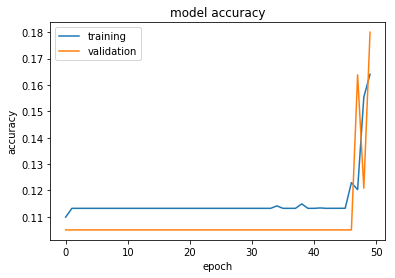


Test loss: 2.27
Test accuracy: 0.192
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_53 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_54 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


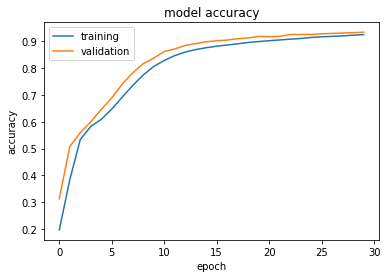


Test loss: 0.297
Test accuracy: 0.924
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


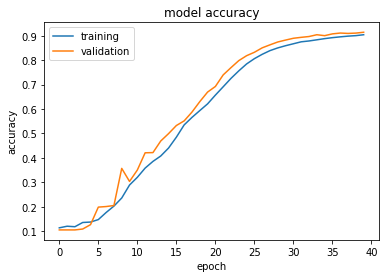


Test loss: 0.409
Test accuracy: 0.9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_63 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_64 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_65 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_66 (Dense)             (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
_________________________________

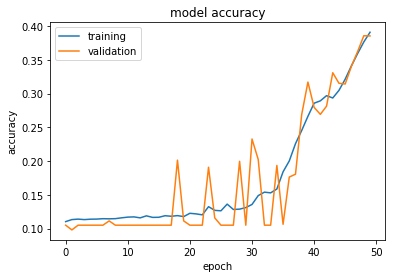


Test loss: 1.62
Test accuracy: 0.39
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_69 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_70 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


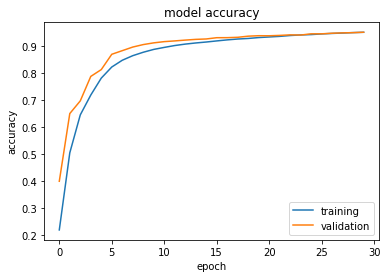


Test loss: 0.217
Test accuracy: 0.936
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_72 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_73 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_74 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_75 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


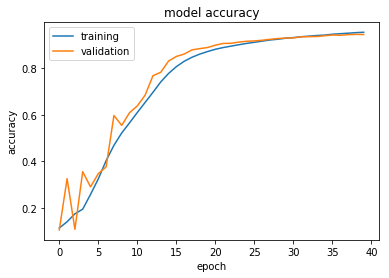


Test loss: 0.242
Test accuracy: 0.935
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_78 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_79 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_80 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_81 (Dense)             (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
___________________________

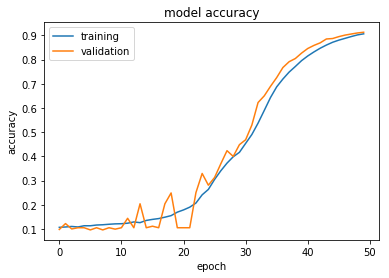


Test loss: 0.437
Test accuracy: 0.898


In [15]:
for nodes_per_layer in [32, 128, 512]:
    for layers in [3, 4, 5]:
        model = create_dense([nodes_per_layer] * layers)
        evaluate(model, epochs=10*layers)

Highest accuracy achieved is 93.6% in neural network with 512 nodes and 3 layers.
Regardless of number of nodes, all networks performed better upto 3 layers. As the layers are increased to 4 and above, accuracy is decreased. In case of 32 nodes and 5 layers, it is worst affected.